In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)


create_pngs_from_wavs('Sounds/children_playing', 'Spectrograms/children_playing')
create_pngs_from_wavs('Sounds/dog_bark', 'Spectrograms/dog_bark')
create_pngs_from_wavs('Sounds/drilling', 'Spectrograms/drilling')
create_pngs_from_wavs('Sounds/gun_shot', 'Spectrograms/gun_shot')

In [33]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

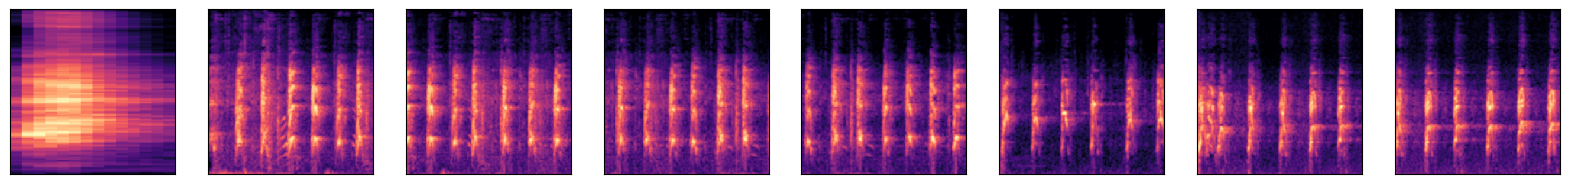

In [3]:
images, labels = load_images_from_path('Spectrograms/dog_bark', 0)
show_images(images)
    
x += images
y += labels

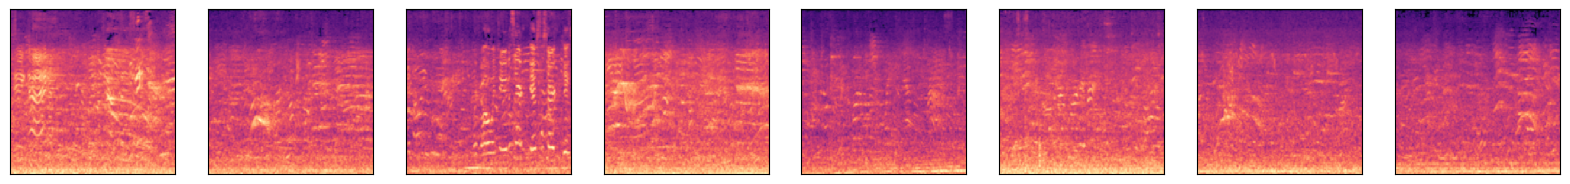

In [4]:
images, labels = load_images_from_path('Spectrograms/children_playing', 1)
show_images(images)
    
x += images
y += labels

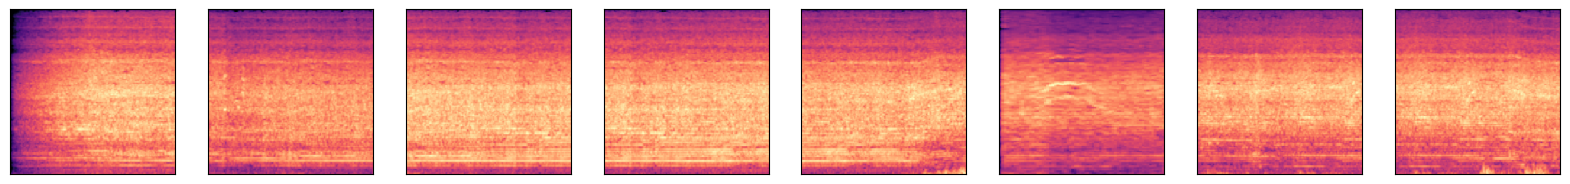

In [7]:
images, labels = load_images_from_path('Spectrograms/drilling', 2)
show_images(images)
    
x += images
y += labels

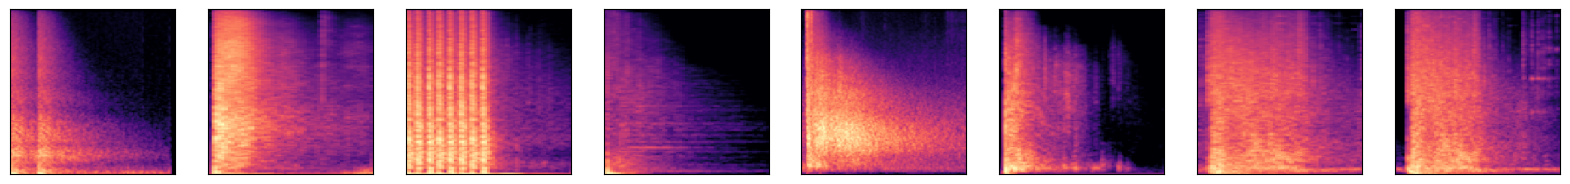

In [8]:
images, labels = load_images_from_path('Spectrograms/gun_shot', 3)
show_images(images)
    
x += images
y += labels

In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.4496 - loss: 1.5048 - val_accuracy: 0.5444 - val_loss: 1.1229
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.6296 - loss: 0.9226 - val_accuracy: 0.6278 - val_loss: 0.9959
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.6290 - loss: 0.9204 - val_accuracy: 0.6444 - val_loss: 0.8983
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.6730 - loss: 0.7904 - val_accuracy: 0.6333 - val_loss: 0.8542
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.7331 - loss: 0.7164 - val_accuracy: 0.5944 - val_loss: 0.8849
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.6567 - loss: 0.8145 - val_accuracy: 0.6222 - val_loss: 0.8768
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.7178 - loss: 0.5859 - val_accuracy: 0.6444 - val_loss: 0.7903
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.7365 - loss: 0.5466 - val_accuracy: 0.

[]

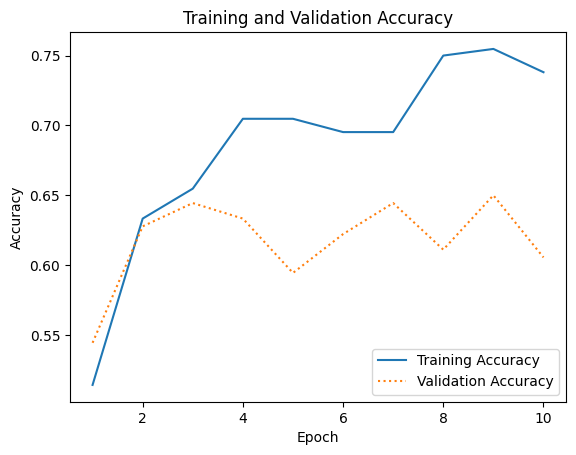

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


In [14]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.8837 - loss: 0.2064 - val_accuracy: 0.6778 - val_loss: 1.3184
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.8657 - loss: 0.1948 - val_accuracy: 0.6778 - val_loss: 1.4106
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - accuracy: 0.8504 - loss: 0.2140 - val_accuracy: 0.6778 - val_loss: 1.3933
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.8599 - loss: 0.1934 - val_accuracy: 0.6778 - val_loss: 1.3234
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.8647 - loss: 0.2022 - val_accuracy: 0.6889 - val_loss: 1.3717
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.8627 - loss: 0.2464 - val_accuracy: 0.6722 - val_loss: 1.2785
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.8884 - loss: 0.1748 - val_accuracy: 0.6722 - val_loss: 1.3178
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.8633 - loss: 0.1889 - val_accu

In [52]:
# Save the model to a file
model.save('model.h5')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(110.30937499999997, 0.5, 'Actual label')

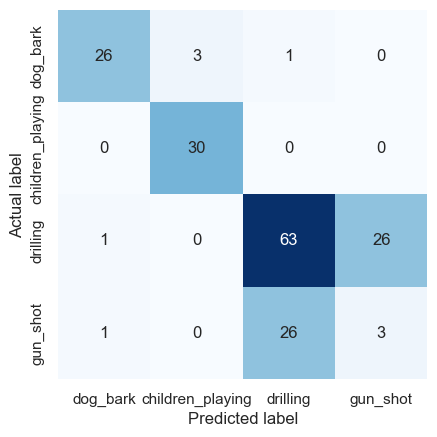

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['dog_bark', 'children_playing', 'drilling', 'gun_shot']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

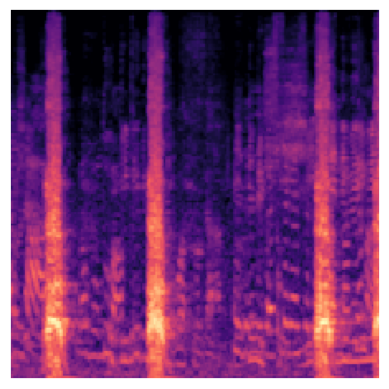

In [44]:
create_spectrogram('Sounds/samples/sample (1).wav', 'Spectrograms/sample.png')

x = image.load_img('Spectrograms/sample.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [45]:
x = image.img_to_array(x, data_format='channels_last', dtype='float32')

In [46]:
if x.shape[0] == 0 or x.shape[1] == 0:
    raise ValueError(f"Unsupported image shape: {x.shape}")

In [47]:
x = np.expand_dims(x, axis=0)


In [48]:
x = preprocess_input(x)



In [49]:
y = base_model.predict(x)
predictions = model.predict(y)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [50]:
for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

dog_bark: 1.0
children_playing: 1.1488827666994439e-08
drilling: 6.922492699070425e-16
gun_shot: 8.733567294778816e-18


Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x000002D4F0B28A40>:
Traceback (most recent call last):
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sounddevice.py", line 854, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sounddevice.py", line 2710, in _wrap_callback
    callback(*args)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_34244\3932036238.py", line 55, in audio_callback
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_34244\3932036238.py", line 42, in classify_audio
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\User

Press Ctrl+C to stop.
Stopped by user.
